<a href="https://colab.research.google.com/github/Anukrati0609/course-recommendor-db/blob/main/psnr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import peak_signal_noise_ratio as psnr

In [265]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


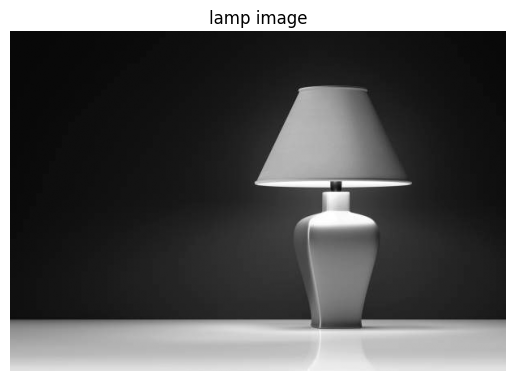

In [266]:
img= cv2.imread('/content/drive/MyDrive/ColabNotebooks/lamp.jpg')
img_gray=cv2.imread('/content/drive/MyDrive/ColabNotebooks/lamp.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.title("lamp image")
plt.show()

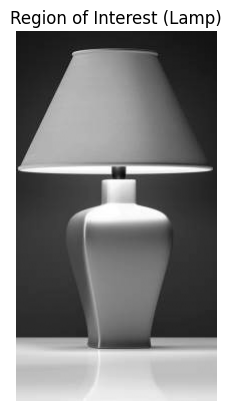

In [267]:
x, y, w, h = 300, 50, 200, 400
roi = img_gray[y:y+h, x:x+w]

plt.imshow(roi, cmap='gray')
plt.axis('off')
plt.title("Region of Interest (Lamp)")
plt.show()


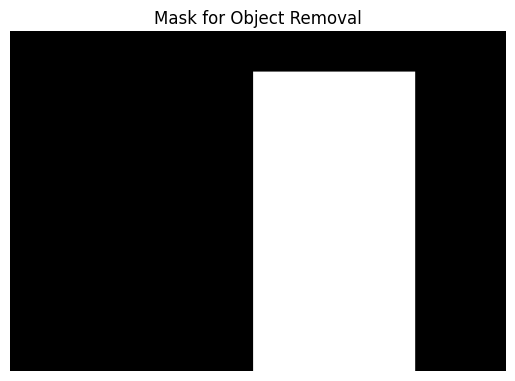

In [268]:
mask=np.zeros(img_gray.shape,np.uint8)
mask[y:y+h, x:x+w]=255
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Mask for Object Removal")
plt.show()


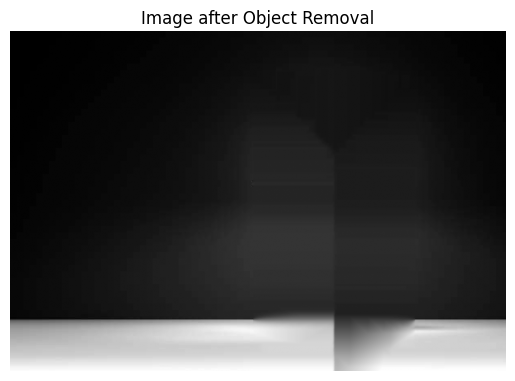

In [269]:
# Inpaint the masked area
#inpainted_img = cv2.inpaint(img_gray, mask, 3, cv2.INPAINT_TELEA)
inpainted_img = cv2.inpaint(img_gray, mask, 8, cv2.INPAINT_NS)

plt.imshow(inpainted_img, cmap='gray')
plt.axis('off')
plt.title("Image after Object Removal")
plt.show()


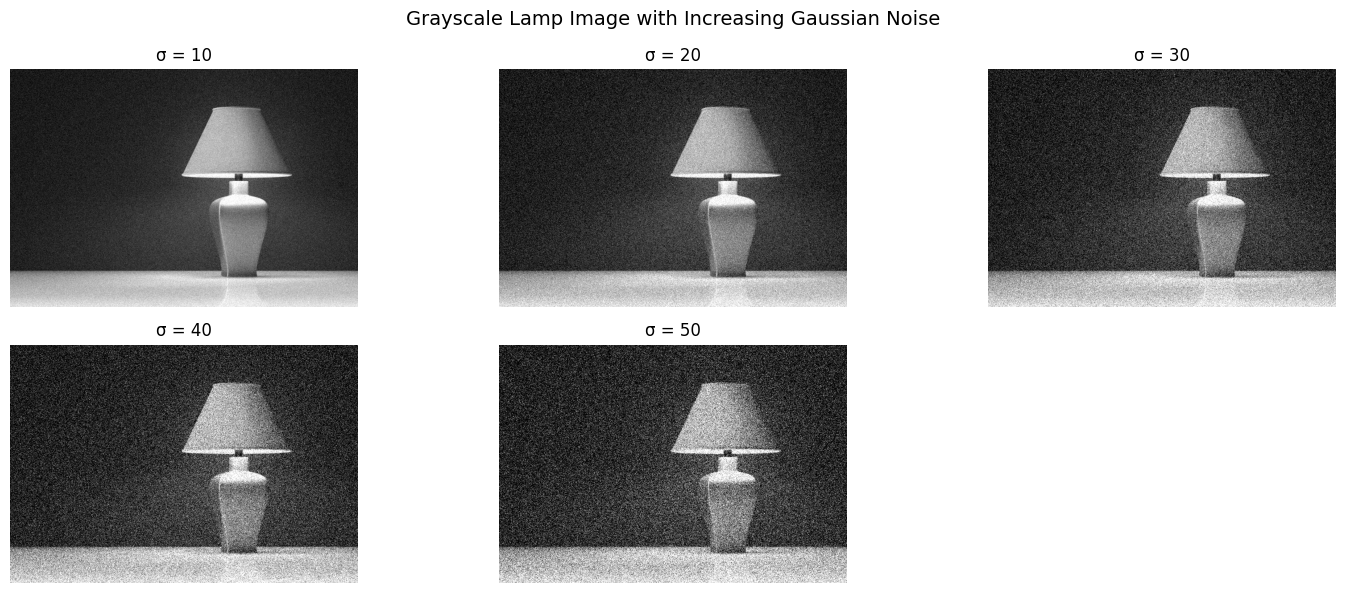

In [270]:
sigmas = [10, 20, 30, 40, 50]

plt.figure(figsize=(15, 6))
for i, s in enumerate(sigmas):
    noisy_img = add_gaussian_noise(img_gray, s)

    # Plot each noisy image
    plt.subplot(2, 3, i + 1)
    plt.imshow(noisy_img, cmap='gray')
    plt.title(f'σ = {s}')
    plt.axis('off')

plt.suptitle("Grayscale Lamp Image with Increasing Gaussian Noise", fontsize=14)
plt.tight_layout()
plt.show()


Noise σ=10: PSNR = 17.03 dB
Noise σ=20: PSNR = 16.43 dB
Noise σ=30: PSNR = 15.71 dB
Noise σ=40: PSNR = 14.99 dB
Noise σ=50: PSNR = 14.33 dB


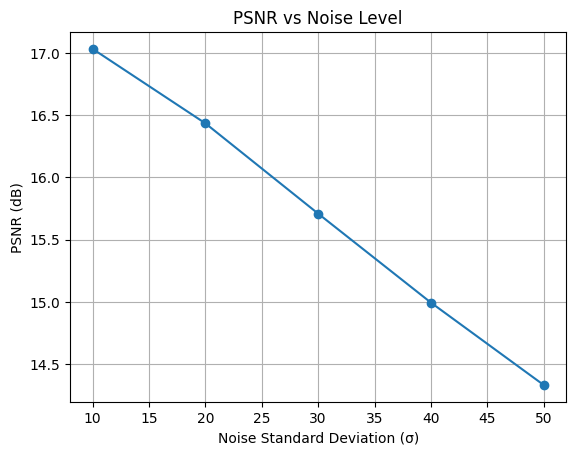

In [271]:
from skimage.metrics import peak_signal_noise_ratio as psnr

def add_gaussian_noise(image, sigma):
    noise = np.random.normal(0, sigma, image.shape).astype(np.float32)
    noisy = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy

sigmas = [10, 20, 30, 40, 50]
psnr_values = []

for s in sigmas:
    noisy_img = add_gaussian_noise(img_gray, s)
    inpainted_noisy = cv2.inpaint(noisy_img, mask, 5, cv2.INPAINT_TELEA)
    psnr_val = psnr(img_gray, inpainted_noisy)
    psnr_values.append(psnr_val)
    print(f"Noise σ={s}: PSNR = {psnr_val:.2f} dB")

# Plot PSNR vs Noise Level
plt.plot(sigmas, psnr_values, marker='o')
plt.title("PSNR vs Noise Level")
plt.xlabel("Noise Standard Deviation (σ)")
plt.ylabel("PSNR (dB)")
plt.grid(True)
plt.show()


PSNR between original and inpainted image (no noise added): 16.60 dB


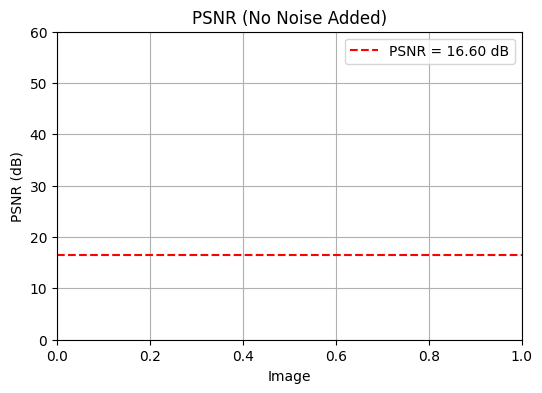

In [272]:
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

# Calculate PSNR between original and inpainted (no noise added)
psnr_val = psnr(img_gray, inpainted_img)
print(f"PSNR between original and inpainted image (no noise added): {psnr_val:.2f} dB")

# Plot just this PSNR value
plt.figure(figsize=(6,4))
plt.axhline(y=psnr_val, color='r', linestyle='--', label=f'PSNR = {psnr_val:.2f} dB')
plt.title("PSNR (No Noise Added)")
plt.xlabel("Image")
plt.ylabel("PSNR (dB)")
plt.ylim(0, 60)  # Adjust this depending on your value
plt.legend()
plt.grid(True)
plt.show()


PSNR without added noise: 16.60 dB


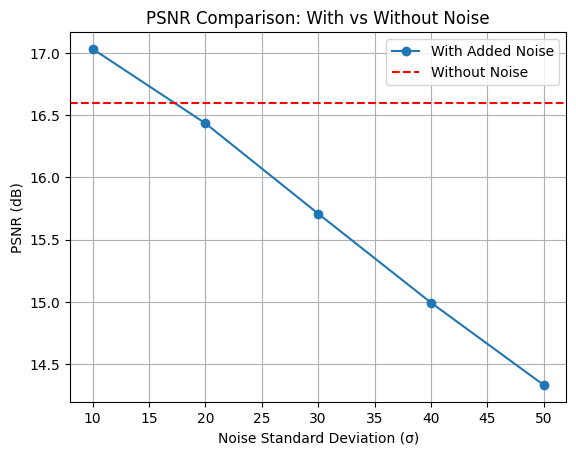

In [273]:
from skimage.metrics import peak_signal_noise_ratio as psnr

# Compute PSNR for clean (non-noisy) inpainting
psnr_clean = psnr(img_gray, inpainted_img)
print(f"PSNR without added noise: {psnr_clean:.2f} dB")

# Add the clean PSNR as a reference line in the same plot
plt.plot(sigmas, psnr_values, marker='o', label='With Added Noise')
plt.axhline(y=psnr_clean, color='r', linestyle='--', label='Without Noise')
plt.title("PSNR Comparison: With vs Without Noise")
plt.xlabel("Noise Standard Deviation (σ)")
plt.ylabel("PSNR (dB)")
plt.legend()
plt.grid(True)
plt.show()
